# Developer analysis of programming languages used in United States 2020

> A data analysis using Stackoverflow’s 2020 Annual Developer Survey.

![](./lapppy.jpg)

## Introduction

This document explores a Stackoverflow dataset containing Developer survey responses in the United States, and in the world in 2020. 

Get Your Dataset Here https://insights.stackoverflow.com/survey

The report will gather & analyze Developer responses of 2020

To find out the most common programming languages used in US which is by resolve the following questions:-

* What are most common programming language in United States?
* Demanding programming languagues in United States?
* What are the most popular roles in United States?

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings

In [3]:
df2020 = pd.read_csv('developer_survey_2020/survey_results_public.csv')
df2019 = pd.read_csv('developer_survey_2019/survey_results_public.csv')

In [4]:
df2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

# What are most used programming languages in United States?

In [5]:
def filter_country(df, column_filter, country, columns):
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Brazil and selecting some columns.
us_2019 = filter_country(df2019, 'Country', 'United States', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
us_2020 = filter_country(df2020, 'Country', 'United States', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [29]:
def filter_role(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by US and selecting some columns.
US2019_role = filter_country(df2019, 'Country', 'United States', ['DevType'])
US2020_role = filter_country(df2020, 'Country', 'United States', ['DevType'])

In [31]:
def split_column(df, column):
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_lang_2019 = split_column(us_2019, 'LanguageWorkedWith')
wanted_lang_2019 = split_column(us_2019, 'LanguageDesireNextYear')

worked_lang_2020 = split_column(us_2020, 'LanguageWorkedWith')
wanted_lang_2020 = split_column(us_2020, 'LanguageDesireNextYear')

role_2019 = split_column(US2019_role, 'DevType')
rolw_2020 = split_column(US2020_role, 'DevType')

In [35]:
def disarray(array_list):
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages_2019 = disarray(worked_lang_2019)
list_wanted_languages_2019 = disarray(wanted_lang_2019)

list_worked_languages_2020 = disarray(worked_lang_2020)
list_wanted_languages_2020 = disarray(wanted_lang_2020)

list_role_2019 = disarray(role_2019)
list_role_2020 = disarray(rolw_2020)

In [36]:
def group_list(data_list, year):

    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2019 = group_list(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = group_list(list_wanted_languages_2020, '2019')

dict_worked_languages_2020 = group_list(list_worked_languages_2020, '2020')
dict_wanted_languages_2020 = group_list(list_wanted_languages_2020, '2020')

dict_role_2019 = group_list(list_role_2019, '2019')
dict_role_2020 = group_list(list_role_2020, '2020')

In [37]:
def create_dataframe(data_dicts):
   
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_2019, dict_worked_languages_2020])
wanted_languages = create_dataframe([dict_wanted_languages_2019, dict_wanted_languages_2020])

role = create_dataframe([dict_role_2019, dict_role_2020])


In [44]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')
role['Percentage'] = percentage(role, 'Year')


/Users/manisaiprasad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


In [46]:
# Get the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

top_10_role = role.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()


role_chart = role[role['Programming Language'].isin(top_10_role)]


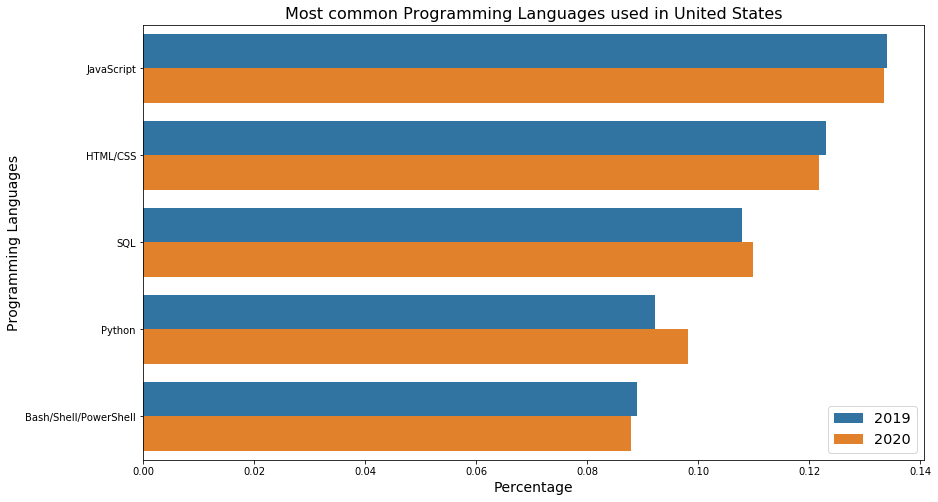

In [47]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in United States', size = 16)
plt.show()


We can see that languages like: Java Script, HTML/CSS, SQL and Python are still in the top positions. 

We can see that in 2020 python has risen a lot compared to other langagues in the survey 


# Demanding programming languagues in United States?

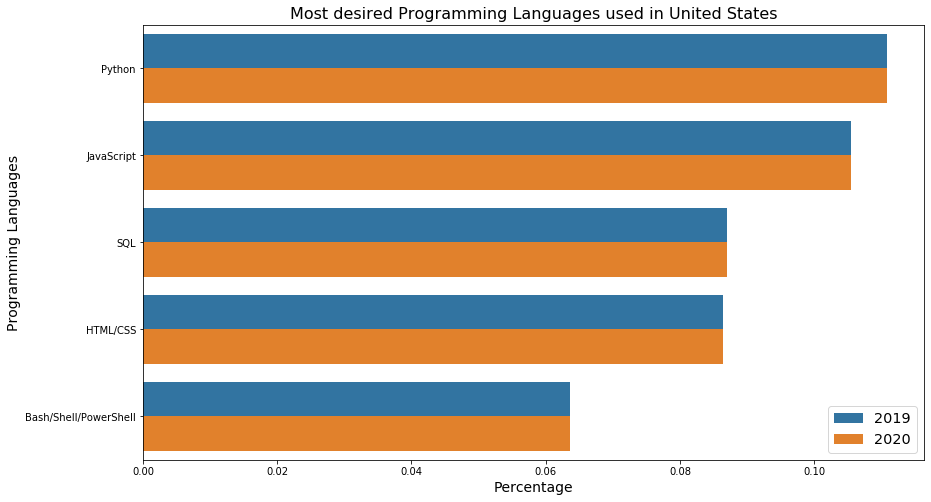

In [52]:

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most desired Programming Languages used in United States', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

We can see that Python have grown tremendously rather then other languages. This is probably happening because its’s a programming language that is very versatile and has been used extensively in data related areas.

Because now we are seeing more interest in machine learning and data science

# What are the most popular roles in United States? 


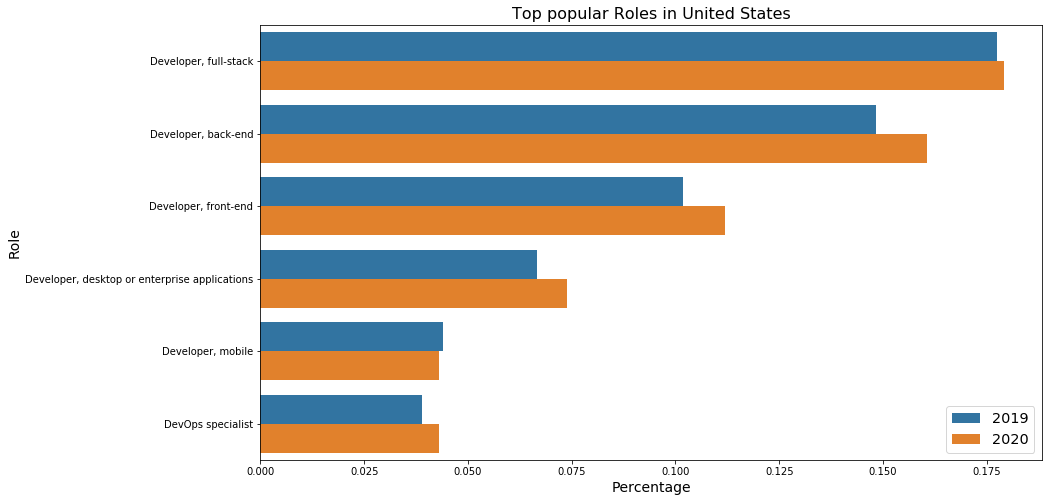

In [53]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = role_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Role", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Top popular Roles in United States', size = 16)
plt.show()

We can see  that Full Stack developer is the most popular role among United States.

Back-end developer, Front end developer is the most popular occupation among participants after 2020.

Mobile developer is the popular role among participants in 2019, whereas in 2020 its trend is slowing down.

# Conclusion

In this article, we took a look at what were the most popular programming languages, according to Stackoverflow’s 2019 and 2020 Developer Survey data.

We have seen that programming languages like as JavaScript, SQL, and Python still dominates the industry

And we can see that Python have grown tremendously rather then other languages. This is probably happening because its’s a programming language that is very versatile and has been used extensively in data related areas.

Back-end developer, Full-stack web developer, Front end developer is the most popular roles among participants after 2020.

To see more about this analysis, see the link to my dev.to post here 

https://dev.to/manisaiprasad/developer-analysis-of-programming-languages-used-in-the-united-states-2020-p8j

# References


Stackoverflow Developer Survey Data: https://insights.stackoverflow.com/survey